### First things first

In [77]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler

from sklearn.naive_bayes import MultinomialNB

In [2]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [90]:
df = pd.read_csv('C:/Users/User/Downloads/train_humor.csv').drop(columns = 'id')
df.head(20)

,text,is_humor,humor_rating,humor_controversy,offense_rating
0,TENNESSEE: We're the best state. Nobody even c...,1,2.42,1.0,0.20
1,A man inserted an advertisement in the classif...,1,2.50,1.0,1.10
2,How many men does it take to open a can of bee...,1,1.95,0.0,2.40
3,Told my mom I hit 1200 Twitter followers. She ...,1,2.11,1.0,0.00
4,Roses are dead. Love is fake. Weddings are bas...,1,2.78,0.0,0.10
5,"'Trabajo,' the Spanish word for work, comes fr...",0,NaN,NaN,0.00
6,I enrolled on some skill training and extra cu...,0,NaN,NaN,0.10
7,ME: I'm such an original. Truly one of a kind....,1,1.79,1.0,0.00
8,Men who ejaculated 21 times or more a month ha...,0,NaN,NaN,0.05
9,I got REALLY angry today and it wasn't about n...,0,NaN,NaN,0.15


In [94]:
df.iloc[6].text

"I enrolled on some skill training and extra curricula activities that added shape to my weekends and after-work schedule. The more days passed, the more exposed I was to how blindly in love I was with an obsession. It's been months now and we are just cool as men."

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['text']], df['is_humor'], test_size = 0.2, random_state = 21)

In [ ]:
X_train.describe()

In [6]:
total = len(y_train)
print('% of positives is ', round(y_train.sum()/total, 2)) #'% of positives is {:.2f}'.format(y_train.sum()/total)
print('% of negatives is ', round((total - y_train.sum())/total, 2)) #'% of negatives is {:.2f}'.format((total - y_train.sum())/total)

% of positives is  0.61
% of negatives is  0.39


(array([2466.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3934.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

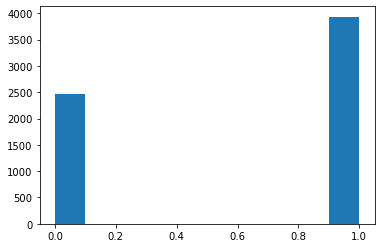

In [7]:
plt.hist(y_train)

In [8]:
def stemmer(text, stemmer):
    return(' '.join([stemmer.stem(w) for w in word_tokenize(text)]))

def count_words(input):
    """ Returns number of occurences of characters specified in char """     
    return len(input.split())

def remove_punctuation(s_input, include_char = None):
    """ Returns input string without punctuation """
    import string as String
    punct = String.punctuation
    
    if not include_char is None:
        index = String.punctuation.index(include_char)
        punct = String.punctuation[:index] + String.punctuation[(index + 1):]
        
    punct += '\n'
        
    translator = str.maketrans(punct, ' '*len(punct))
    
    return s_input.translate(translator)

def remove_stopwords(text, use_stopwords = None, df = True, exclude_number = True):
    """ Returns input string removing stopwords from it. """
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    
    if use_stopwords is None:
        use_stopwords = set(stopwords.words("english"))
        
    if df:
        new_text = word_tokenize(text)
        if exclude_number:
            new_text = [word for word in new_text if not word.isnumeric()]
        new_text = " ".join([word for word in new_text if word not in use_stopwords])
    else:
        new_text = ""
        for word in text:
            if word not in use_stopwords:
                new_text += word + " "

    return new_text

def sep_upper(text):
    """ Take a text as input and insert space before every uppercase letter. """
    
    new_text = ""
    for letter in text:
        if letter.isupper():
            new_text += " " + letter
        else:
            new_text += letter
    
    return new_text

def remove_space(text):
    return(re.sub(' +',' ',text)) 

In [9]:
def pre_proc(text_col):
    text_col = text_col.apply(remove_punctuation) # removes String.punctuation characters
    #text_col = text_col.apply(remove_stopwords)   # removes english stopwords 
    text_col = text_col.str.replace('[^\w\s]','').str.strip() # and removes whitespaces
    text_col = text_col.apply(sep_upper) # adds space before an uppercase
    text_col = text_col.str.lower() # lowercase
    
    return text_col

In [10]:
X_train.text = pre_proc(X_train.text)
X_test.text = pre_proc(X_test.text)

In [11]:
X_train['qtd_words'] = X_train.text.apply(count_words)
X_test['qtd_words'] = X_test.text.apply(count_words)

In [12]:
X_test.head()

,text,qtd_words
1705,like if i had information i could dismiss fro...,15
6185,since my wife left i ve bought a harley d...,36
899,there s a man walking a tight rope 100ft bel...,33
7453,my wife yelled at me saying you weren t ev...,26
2772,bipolar depression is technically referred to...,21


In [13]:
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)
get_numerical_data = FunctionTransformer(lambda x: x[['qtd_words']], validate=False)

process_and_join_features = Pipeline([('features', FeatureUnion([
    ('text_features', Pipeline([('selector', get_text_data), 
                                ('vec', CountVectorizer())])),
    ('nume_features', Pipeline([('selector', get_numerical_data), 
                                ('scaler', MinMaxScaler())]))
    ])),
    ('clf', MultinomialNB())
                                      ])

In [3]:
process_and_join_features.fit(X_train, y_train)
predicted_CountVectorizer = process_and_join_features.predict(X_test)

NameError: name 'process_and_join_features' is not defined

In [15]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, predicted_CountVectorizer))

0.85125


In [78]:
df_offense = pd.read_csv('C:/Users/User/Downloads/train_humor.csv').drop(columns = ['id','is_humor','humor_rating','humor_controversy'])
df_offense.head()

,text,offense_rating
0,TENNESSEE: We're the best state. Nobody even c...,0.2
1,A man inserted an advertisement in the classif...,1.1
2,How many men does it take to open a can of bee...,2.4
3,Told my mom I hit 1200 Twitter followers. She ...,0.0
4,Roses are dead. Love is fake. Weddings are bas...,0.1


In [79]:
df_offense.offense_rating.value_counts()

0.00    3388
0.15     394
0.05     387
0.10     333
0.20     306
        ... 
4.85       2
4.80       2
4.55       2
4.75       1
4.45       1
Name: offense_rating, Length: 98, dtype: int64

In [4]:
df_offense.describe()

,offense_rating
count,8000.000000
mean,0.585325
std,0.979955
min,0.000000
25%,0.000000
50%,0.100000
75%,0.700000
max,4.850000


In [5]:
# X_train_offense, X_test_offense, y_train_offense, y_test_offense = train_test_split(df_offense[['text']], df['offense_rating'], test_size = 0.2, random_state = 21)

NameError: name 'df' is not defined

In [80]:
import re
first_description=df_offense.text[0]
description=re.sub("[^a-zA-Z]"," ",first_description) 
description=description.lower()

In [81]:
print(df_offense.text[0])
print(description)

TENNESSEE: We're the best state. Nobody even comes close. *Elevennessee walks into the room* TENNESSEE: Oh shit...
tennessee  we re the best state  nobody even comes close   elevennessee walks into the room  tennessee  oh shit   


In [82]:
import nltk
description= nltk.word_tokenize(description)

In [83]:
import nltk as nlp
lemma = nlp.WordNetLemmatizer()
description = [ lemma.lemmatize(word) for word in description] 

description =" ".join(description)

In [60]:
print(first_description)
print(description)

TENNESSEE: We're the best state. Nobody even comes close. *Elevennessee walks into the room* TENNESSEE: Oh shit...
tennessee we re the best state nobody even come close elevennessee walk into the room tennessee oh shit


In [84]:
description_list = []
for description in df_offense.text:
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()   
    description = nltk.word_tokenize(description)
    lemma = nlp.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)

In [85]:
from sklearn.feature_extraction.text import CountVectorizer 

count_vectorizer = CountVectorizer(stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()  # x

words=count_vectorizer.get_feature_names()
print("Most used words: ",words[50:60])

Most used words:  ['abysmal', 'abyss', 'academic', 'academy', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting']


In [83]:
# from sklearn.preprocessing import StandardScaler
# sparce=count_vectorizer.fit_transform(description_list)
# final_bow_np = StandardScaler(with_mean=False).fit_transform(sparce)

In [84]:
# final_bow_np

<8000x12096 sparse matrix of type '<class 'numpy.float64'>'
	with 74463 stored elements in Compressed Sparse Row format>

In [48]:
# count_vectorizer.fit_transform(description_list)

<8000x6220 sparse matrix of type '<class 'numpy.int64'>'
	with 68587 stored elements in Compressed Sparse Row format>

In [88]:
# sparce_matrix[18]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
# sparce_matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [63]:
description_list

['tennessee we re the best state nobody even come close elevennessee walk into the room tennessee oh shit',
 'a man inserted an advertisement in the classified wife wanted the next day he received of reply all reading you can have mine free delivery also available at your door step',
 'how many men doe it take to open a can of beer none it should be open by the time she brings it to the couch',
 'told my mom i hit twitter follower she pointed out how my brother owns a house and i m wanted by several collection agency oh ma',
 'rose are dead love is fake wedding are basically funeral with cake',
 'trabajo the spanish word for work come from the latin term trepaliare meaning torture',
 'i enrolled on some skill training and extra curriculum activity that added shape to my weekend and after work schedule the more day passed the more exposed i wa to how blindly in love i wa with an obsession it s been month now and we are just cool a men',
 'me i m such an original truly one of a kind also

In [64]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
y = df_offense.iloc[:,1].values 
encoded = lab_enc.fit_transform(y)

In [30]:
# x = final_bow_np
# train test split
# from sklearn.model_selection import train_test_split
# x_traine_offen, x_teste_offen, y_traine_offen, y_teste_offen = train_test_split(x,encoded, test_size = 0.1, random_state = 42)

NameError: name 'final_bow_np' is not defined

In [65]:
x = sparce_matrix
# train test split
from sklearn.model_selection import train_test_split
x_train_offen, x_test_offen, y_train_offen, y_test_offen = train_test_split(x,encoded, test_size = 0.1, random_state = 42)

In [66]:
encoded

array([ 4, 22, 48, ...,  0, 60,  0], dtype=int64)

In [28]:
# x_train_offen

<7200x12096 sparse matrix of type '<class 'numpy.int64'>'
	with 67305 stored elements in Compressed Sparse Row format>

In [69]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_offen,y_train_offen)

GaussianNB()

In [70]:
y_pred = nb.predict(x_test_offen)
print("accuracy: ",nb.score(y_pred.reshape(-1,1),y_test_offen))

accuracy:  0.12375


In [72]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train_offen,y_train_offen)

MultinomialNB()

In [73]:
y_pred = clf.predict(x_test_offen)

In [74]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test_offen, y_pred, squared=False)
rms

24.391212556984534

In [75]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=60)
lr.fit(x_train_offen,y_train_offen)
print("lr accuracy: ",lr.score(x_test_offen,y_test_offen))

lr accuracy:  0.3925


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train_offening,y_train_offening)
print("lm accuracy: ",lm.score(x_test_offening,y_test_offening))

lm accuracy:  -2.8513631151185744e+21


In [88]:
x_train_offening

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [89]:
y_train_offening

array([0.  , 0.  , 0.  , ..., 0.  , 0.1 , 2.25])

In [47]:
# lm_pred=lm.predict(x_test_offen)

In [49]:
# rms = mean_squared_error(y_test_offen, lm_pred, squared=False)
# rms

1121357440067.0234

In [67]:
y_pred_offen=lr.predict(x_test_offen)

In [72]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test_offen, y_pred_offen, squared=False)

In [76]:
rms

24.391212556984534

In [ ]:
from sklearn.svm import SVC   
clf = SVC(kernel='linear')  
  
# fitting x samples and y classes  
clf.fit(x_train_offen,y_train_offen)

In [ ]:
clf.predict(x_test_offen)

In [18]:
sc = StandardScaler()

In [86]:
x = sparce_matrix
# train test split
from sklearn.model_selection import train_test_split
x_train_offening, x_test_offening, y_train_offening, y_test_offening = train_test_split(x,y, test_size = 0.1, random_state = 42)

In [19]:
X_train = sc.fit_transform(x_train_offen)
X_test = sc.fit_transform(x_test_offen)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [35]:
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(x_train_offen, y_train_offen)
pred_rfc = rfc.predict(x_test_offen)

In [36]:
pred_rfc

array([35,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0, 24, 26,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 47,  5,  0,  0, 30,  0,  0,  0,  0,  2,  4,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  4,  0,
        0, 34,  0,  0,  5,  0, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0, 25,  0,  0, 34,  0,
        0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0, 44,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       48, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0, 25,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [37]:
y_test_offen

array([ 3, 10, 16,  0,  6, 12, 47, 26,  8,  0,  0,  0,  0,  0, 17, 34, 52,
        0, 10, 20, 27,  0,  4,  0,  0,  0,  2,  0, 28,  2,  0,  1,  0,  0,
       30,  0,  0, 10, 55, 59, 10, 18, 36, 54,  1,  0,  3,  0, 12,  3,  0,
        0,  3,  2,  0,  0, 36,  0, 24,  8, 28,  0, 11,  0, 14,  2,  6,  8,
       86, 46,  0,  0,  2,  3, 69,  0,  5, 62,  0,  5,  0,  1, 17,  0, 66,
        4,  0,  5,  0,  0,  4, 22,  0,  3,  3,  0, 10, 20, 14, 10, 23,  0,
        0,  0, 27,  0,  1,  2,  0,  5,  5,  0,  0, 26,  1, 21,  0,  4,  0,
        0, 46, 28,  4,  0,  5,  0, 13,  0,  1,  0, 91,  0,  0, 39,  0, 31,
        2,  0,  0,  0, 18,  0,  0,  0, 55, 14, 18,  0,  4, 15, 90,  4,  0,
        0,  0, 26,  3, 74,  2, 35,  1,  0,  1,  0,  3, 46, 13,  0,  0,  5,
       31,  0,  0,  6, 44,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       34, 34,  3,  0, 25,  6,  5, 53, 29, 17,  0,  0,  0,  0, 24, 28,  0,
       37,  0,  0,  0,  2,  0,  0, 46,  3, 53,  7,  3, 54,  0,  5,  5,  1,
        4,  0,  0, 12,  4

In [40]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test_offen, pred_rfc, squared=False)

In [41]:
rmse

21.174660563985434

In [156]:
print(classification_report(y_test_offen, pred_rfc))

              precision    recall  f1-score   support

           0       0.48      0.96      0.64       329
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        42
           4       0.50      0.02      0.05        41
           5       0.00      0.00      0.00        28
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00        10
           9       1.00      0.14      0.25         7
          10       0.25      0.12      0.17        16
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         4
          17       0.00    

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors = 5) #setting up the KNN model to use 5NN
knn.fit(x_train_offen, y_train_offen) #fitting the KNN

KNeighborsClassifier()

In [ ]:
knn.predict(x_test_offen)

In [26]:
print("knn",knn.predict(x_test_offen))

KeyboardInterrupt: 

In [ ]:
print("knn accuracy: ",knn.score(X_test,y_test_offen))

In [95]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

0.7

In [104]:
regr = ElasticNet(random_state=0)
regr.fit(x_train_offening, y_train_offening)

ElasticNet(random_state=0)

In [106]:
regr_pred

array([0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922222,
       0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922222,
       0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922222,
       0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922222,
       0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922222,
       0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922222,
       0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922222,
       0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922222,
       0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922222,
       0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922222,
       0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922222,
       0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922222,
       0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922222,
       0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922222,
       0.57922222, 0.57922222, 0.57922222, 0.57922222, 0.57922

In [101]:
print("accuracy: ",regr.score(x_test_offening,y_test_offening))

accuracy:  -0.003378154383479881


In [125]:
from sklearn.linear_model import Ridge
>>> import numpy as np
>>> clf = Ridge(alpha=1.0)
>>> clf.fit(x_train_offening, y_train_offening)
Ridge()

Ridge()

In [139]:
import lightgbm as lgb
lgb_train=lgb.Dataset(x_train_offening, y_train_offening)

In [153]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [152]:
!pip install xgboost

In [154]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(x_train_offening, y_train_offening)

y_pred = xgb_model.predict(x_test_offening)

mse=mean_squared_error( y_test_offening, y_pred)

print(np.sqrt(mse))

[20:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
0.7372343878828921


In [156]:
xgb2_model =xgb.XGBRegressor(learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective="reg:linear",
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb2_model.fit(x_train_offening, y_train_offening)

y_pred = xgb2_model.predict(x_test_offening)

mse=mean_squared_error( y_test_offening, y_pred)

print(np.sqrt(mse))

[20:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[20:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
0.7713949977766794


In [148]:
cl_pred=lgb.Dataset(x_test_offening, y_test_offening, reference=lgb_train)
# specify your configurations as a dict
params = {'num_leaves': 100,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.015,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 5,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": 4,
         "random_state": 4950}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=cl_pred,
                early_stopping_rounds=10)

Starting training...
[1]	valid_0's rmse: 1.04764
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.04377
[3]	valid_0's rmse: 1.03958
[4]	valid_0's rmse: 1.03553
[5]	valid_0's rmse: 1.03218
[6]	valid_0's rmse: 1.02819
[7]	valid_0's rmse: 1.02447
[8]	valid_0's rmse: 1.02066
[9]	valid_0's rmse: 1.01695
[10]	valid_0's rmse: 1.01344
[11]	valid_0's rmse: 1.01016
[12]	valid_0's rmse: 1.00681
[13]	valid_0's rmse: 1.00348
[14]	valid_0's rmse: 1.00044
[15]	valid_0's rmse: 0.997479
[16]	valid_0's rmse: 0.994305
[17]	valid_0's rmse: 0.991499
[18]	valid_0's rmse: 0.988446
[19]	valid_0's rmse: 0.98576
[20]	valid_0's rmse: 0.98285
[21]	valid_0's rmse: 0.980284
[22]	valid_0's rmse: 0.977764
[23]	valid_0's rmse: 0.975159
[24]	valid_0's rmse: 0.972642
[25]	valid_0's rmse: 0.970069
[26]	valid_0's rmse: 0.967603
[27]	valid_0's rmse: 0.965585
[28]	valid_0's rmse: 0.963433
[29]	valid_0's rmse: 0.961326
[30]	valid_0's rmse: 0.959469
[31]	valid_0's rmse: 0.957076
[32]	valid_0'

In [ ]:
cl_pred

In [133]:
import sklearn.metrics as metrics
mese = metrics.mean_squared_error(y_test_offening, cl_pred)
mese

0.6534491875190482

In [126]:
clf_pred=clf.predict(x_test_offening)

In [127]:
clf_pred

array([ 2.95214748,  0.62150835,  1.42091899,  0.66834384,  1.39744898,
        1.13649137,  1.40466051,  1.25220444,  0.73135378,  0.13656722,
        0.12760511, -0.49521349,  0.17837308,  0.53063053,  1.89880735,
        0.75758929,  2.59156872,  0.25453505,  0.49947011,  0.89081323,
        1.11057401, -0.12508394,  0.73851827, -0.30261206, -0.03948842,
        0.14092645,  0.19924742,  0.36659694,  1.19417142, -0.07132985,
        0.63017785, -0.0746592 , -0.07746742,  0.23243941,  0.34559107,
        0.58742694,  0.75154708, -0.2152513 ,  2.2815954 ,  1.30084151,
        0.45678627, -0.07502941,  0.92077267,  1.67157456,  0.56978197,
        1.31956033,  0.79763722, -0.43293012,  0.53398555,  1.55424846,
        0.33508816,  0.33762782,  1.52281505,  0.73641848,  0.30171684,
        0.43122244,  4.18357953, -0.45433622,  2.73230094,  0.54840519,
        1.86439012,  0.28773143,  0.83314097, -0.02896815,  0.36035837,
        0.48322971,  1.49458314,  0.36015831,  2.30711212,  1.16

In [110]:
print("accuracy: ",clf.score(x_test_offening,y_test_offening))

accuracy:  0.40729825866125435


In [114]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test_offening, clf_pred, squared=False)
rms

0.8083620398800578

In [117]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test_offening, clf_pred)
mse

0.6534491875190482

In [118]:
rmse = np.sqrt(mse)
rmse

0.8083620398800578